<a href="https://colab.research.google.com/github/chitranshi135/ZORO_endsem_lab_codes/blob/main/N_ArmBandit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**N-Arm Bandit with Non-Stationary Rewards**







In [ ]:
import random
import matplotlib.pyplot as plt
random.seed(0)
# --- Bandit ---
class Bandit(object):
  def __init__(self, N):
    # N = number of arms
    self.N = N
    expRewards = [7]*N
    self.expRewards = expRewards
  def actions(self):
    result = list(range(0,self.N))
    return result
  def reward(self, action):
    reward = []
    #incrementing rewards at each time step
    for i in range(self.N):
      self.expRewards[i] += random.gauss(0,0.01)

    reward = self.expRewards[action]
    return reward


In [ ]:
def eGreedy_modified(myBandit, epsilon, max_iteration, alpha):
  # Initialization 
  Q = [0]*myBandit.N 
  count = [0]*myBandit.N
  epsilon = epsilon
  r = 0
  R = []
  R_avg = [0]*1
  # Incremental Implementation
  for iter in range(1,max_iteration+1):
    if random.random() > epsilon:
      action = Q.index(max(Q)) # Exploit/ Greed
    else:
      action = random.choice(myBandit.actions()) # Explore
    r = myBandit.reward(action)
    R.append(r)
    count[action] = count[action]+1
    Q[action] = Q[action]+ alpha*(r - Q[action])
    R_avg.append(R_avg[iter-1] + (r-R_avg[iter-1])/iter)
    if iter == max_iteration:
      actionTaken = [""]*myBandit.N
      for i in range(1,myBandit.N+1) :
        print("Final Counts for move ",i, " : ", count[i-1])
        actionTaken[i-1] = "{}".format(i)

      # Create bar plot
      plt.bar(actionTaken, count)

      # Set plot title and axis labels
      plt.title("Number of times each action taken")
      plt.xlabel("Action")
      plt.ylabel("Count")

      # Show plot
      plt.show()

  return Q, R_avg, R

Final Counts for move  1  :  397
Final Counts for move  2  :  390
Final Counts for move  3  :  3308
Final Counts for move  4  :  440
Final Counts for move  5  :  407
Final Counts for move  6  :  418
Final Counts for move  7  :  400
Final Counts for move  8  :  392
Final Counts for move  9  :  3464
Final Counts for move  10  :  384


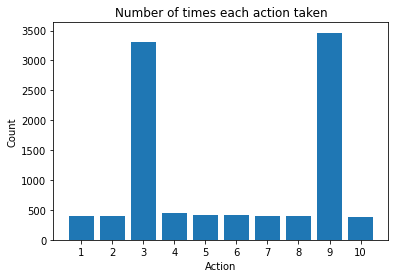

In [ ]:
random.seed(3)
myBandit = Bandit(N=10)
Q, R_avg, R = eGreedy_modified(myBandit, 0.4, 10000, 0.01)

In [ ]:
print("******************        RESULTS FOR BANDIT A         *************************")

for i in range(1,myBandit.N+1) :
  print("Observed Average Reward for action ",i, " : ", Q[i-1])
  print("Actual Reward for action           ",i, " : ", myBandit.expRewards[i-1])
  print("----------------------------------------------------------------------------------")

print("**********************************************************************************")

******************        RESULTS FOR BANDIT A         *************************
Observed Average Reward for action  1  :  5.81040083845304
Actual Reward for action            1  :  5.690767978995215
----------------------------------------------------------------------------------
Observed Average Reward for action  2  :  6.916630817859252
Actual Reward for action            2  :  7.306311928763355
----------------------------------------------------------------------------------
Observed Average Reward for action  3  :  8.275478498733687
Actual Reward for action            3  :  8.351367011110957
----------------------------------------------------------------------------------
Observed Average Reward for action  4  :  7.340156741727628
Actual Reward for action            4  :  7.230258416121292
----------------------------------------------------------------------------------
Observed Average Reward for action  5  :  6.669543220379781
Actual Reward for action            5  :  6.8017

Text(0.5, 0.98, 'Modified Epsilon Greedy Policy')

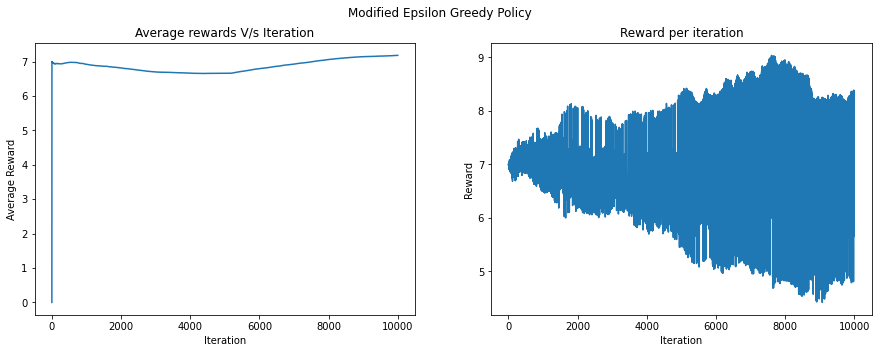

In [ ]:
import matplotlib.pyplot as plt
# display the images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(R_avg)
ax1.title.set_text("Average rewards V/s Iteration")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Average Reward")
ax2.plot(R)
ax2.title.set_text("Reward per iteration")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Reward")
fig.suptitle("Modified Epsilon Greedy Policy")